<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/src/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Intermediate NumPy</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="http://www.contribute.geeksforgeeks.org/wp-content/uploads/numpy-logo1.jpg" alt="NumPy Logo" style="height: 250px;"></div>

### Questions
1. How do we work with the multiple dimensions in a NumPy Array?
1. How can we extract irregular subsets of data?
1. How can we sort an array?

### Objectives
1. <a href="#indexing">Using axes to slice arrays</a>
1. <a href="#boolean">Index arrays using true and false</a>
1. <a href="#integers">Index arrays using arrays of indices</a>

<a name="indexing"></a>
## 1. Using axes to slice arrays

The solution to the last exercise in the Numpy Basics notebook introduces an important concept when working with NumPy: the axis. This indicates the particular dimension along which a function should operate (provided the function does something taking multiple values and converts to a single value). 

Let's look at a concrete example with `sum`:

In [1]:
# Convention for import to get shortened namespace
import numpy as np

In [2]:
# Create an array for testing
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [3]:
# This calculates the total of all values in the array
np.sum(a)

66

In [4]:
# Keep this in mind:
a.shape

(3, 4)

In [5]:
# Instead, take the sum across the rows:
np.sum(a, axis=0)

array([12, 15, 18, 21])

In [6]:
# Or do the same and take the some across columns:
np.sum(a, axis=1)

array([ 6, 22, 38])

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Finish the code below to calculate advection. The trick is to figure out
          how to do the summation.</li>
    </ul>
</div>

In [7]:
# Synthetic data
temp = np.random.randn(100, 50)
u = np.random.randn(100, 50)
v = np.random.randn(100, 50)

# Calculate the gradient components
gradx, grady = np.gradient(temp)

# Turn into an array of vectors:
# axis 0 is x position
# axis 1 is y position
# axis 2 is the vector components
grad_vec = np.dstack([gradx, grady])
print(grad_vec.shape)

# Turn wind components into vector
wind_vec = np.dstack([u, v])

# Calculate advection, the dot product of wind and the negative of gradient
# DON'T USE NUMPY.DOT (doesn't work). Multiply and add.


(100, 50, 2)


<div class="alert alert-info">
    <b>SOLUTION</b>
</div>

In [8]:
# %load solutions/advection.py

# Cell content replaced by load magic replacement.
advec = (wind_vec * -grad_vec).sum(axis=-1)
print(advec.shape)


(100, 50)


<a href="#top">Top</a>
<hr style="height:2px;">

<a name="boolean"></a>
## 2. Indexing Arrays with Boolean Values
Numpy can easily create arrays of boolean values and use those to select certain values to extract from an array

In [9]:
# Create some synthetic data representing temperature and wind speed data
np.random.seed(19990503)  # Make sure we all have the same data
temp = (20 * np.cos(np.linspace(0, 2 * np.pi, 100)) +
        50 + 2 * np.random.randn(100))
spd = (np.abs(10 * np.sin(np.linspace(0, 2 * np.pi, 100)) +
              10 + 5 * np.random.randn(100)))

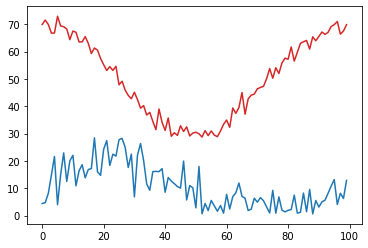

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(temp, 'tab:red')
plt.plot(spd, 'tab:blue');

By doing a comparision between a NumPy array and a value, we get an
array of values representing the results of the comparison between
each element and the value

In [11]:
temp > 45

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

We can take the resulting array and use this to index into the
NumPy array and retrieve the values where the result was true

In [12]:
print(temp[temp > 45])

[69.89825854 71.52313905 69.90028363 66.73828667 66.77980233 72.91468564
 69.34603239 69.09533591 68.27350814 64.33916721 67.49497791 67.05282372
 63.51829518 63.54034678 65.46576463 62.99683836 59.27662304 61.29361272
 60.51641586 57.46048995 55.19793004 53.07572989 54.47998158 53.09552107
 54.59037269 47.84272747 49.1435589  45.87151534 45.11976794 45.009292
 46.36021141 46.87557425 47.25668992 50.09599544 53.77789358 50.24073197
 54.07629059 51.95065202 55.84827794 57.56967086 57.19572063 61.67658285
 56.51474577 59.72166924 62.99403256 63.57569453 64.05984232 60.88258643
 65.37759899 63.94115754 65.53070256 67.15175649 66.26468701 67.03811793
 69.17773618 69.83571708 70.99586742 66.34971928 67.49905207 69.83593609]


So long as the size of the boolean array matches the data, the boolean array can come from anywhere

In [13]:
print(temp[spd > 10])

[66.73828667 66.77980233 69.34603239 69.09533591 68.27350814 64.33916721
 67.49497791 67.05282372 63.51829518 63.54034678 65.46576463 62.99683836
 59.27662304 61.29361272 60.51641586 57.46048995 55.19793004 53.07572989
 54.47998158 53.09552107 54.59037269 47.84272747 49.1435589  45.87151534
 43.95971516 42.72814762 42.45316175 39.2797517  40.23351938 36.77179678
 34.43329229 31.42277612 38.97505745 34.10549575 35.70826448 29.01276068
 30.31180935 29.31602671 32.84580454 30.76695309 29.11344716 30.16652571
 29.91513049 39.51784389 69.17773618 69.83571708 69.83593609]


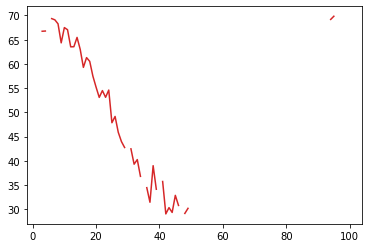

In [14]:
# Make a copy so we don't modify the original data
temp2 = temp.copy()

# Replace all places where spd is <10 with NaN (not a number) so matplotlib skips it
temp2[spd < 10] = np.nan
plt.plot(temp2, 'tab:red')

Can also combine multiple boolean arrays using the syntax for bitwise operations. **MUST HAVE PARENTHESES** due to operator precedence.

In [15]:
print(temp[(temp < 45) & (spd > 10)])

[43.95971516 42.72814762 42.45316175 39.2797517  40.23351938 36.77179678
 34.43329229 31.42277612 38.97505745 34.10549575 35.70826448 29.01276068
 30.31180935 29.31602671 32.84580454 30.76695309 29.11344716 30.16652571
 29.91513049 39.51784389]


<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Heat index is only defined for temperatures >= 80F and relative humidity values >= 40%. Using the data generated below, use boolean indexing to extract the data where heat index has a valid value.</li>
    </ul>
</div>

In [16]:
# Here's the "data"
np.random.seed(19990503)  # Make sure we all have the same data
temp = (20 * np.cos(np.linspace(0, 2 * np.pi, 100)) +
        80 + 2 * np.random.randn(100))
rh = (np.abs(20 * np.cos(np.linspace(0, 4 * np.pi, 100)) +
              50 + 5 * np.random.randn(100)))


# Create a mask for the two conditions described above
# good_heat_index = 



# Use this mask to grab the temperature and relative humidity values that together
# will give good heat index values
# temp[] ?


# BONUS POINTS: Plot only the data where heat index is defined by
# inverting the mask (using `~mask`) and setting invalid values to np.nan

<div class="alert alert-info">
    <b>SOLUTION</b>
</div>

[ 99.89825854 101.52313905  99.90028363  96.73828667  96.77980233
 102.91468564  99.34603239  99.09533591  98.27350814  94.33916721
  97.49497791  97.05282372  93.51829518  93.54034678  95.46576463
  92.99683836  89.27662304  91.29361272  90.51641586  87.46048995
  85.19793004  83.07572989  84.47998158  83.09552107  84.59037269
  80.09599544  83.77789358  80.24073197  84.07629059  81.95065202
  85.84827794  87.56967086  87.19572063  91.67658285  86.51474577
  89.72166924  92.99403256  93.57569453  94.05984232  90.88258643
  95.37759899  93.94115754  95.53070256  97.15175649  96.26468701
  97.03811793  99.17773618  99.83571708 100.99586742  96.34971928
  97.49905207  99.83593609]


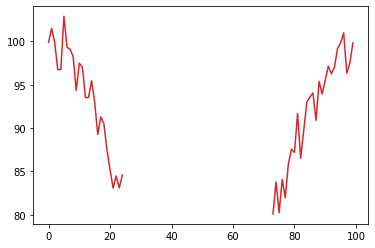

In [17]:
# %load solutions/heat_index.py

# Cell content replaced by load magic replacement.
import numpy as np

# Here's the "data"
np.random.seed(19990503)  # Make sure we all have the same data
temp = (20 * np.cos(np.linspace(0, 2 * np.pi, 100)) +
        80 + 2 * np.random.randn(100))
rh = (np.abs(20 * np.cos(np.linspace(0, 4 * np.pi, 100)) +
              50 + 5 * np.random.randn(100)))

# Create a mask for the two conditions described above
good_heat_index = (temp >= 80) & (rh >= 0.4)

# Use this mask to grab the temperature and relative humidity values that together
# will give good heat index values
print(temp[good_heat_index]) 

# BONUS POINTS: Plot only the data where heat index is defined by
# inverting the mask (using ~mask) and setting invalid values to np.nan
temp[~good_heat_index] = np.nan
plt.plot(temp, 'tab:red')


<a href="#top">Top</a>
<hr style="height:2px;">

<a name="integers"></a>
## 3. Indexing using arrays of indices

You can also use a list or array of indices to extract particular values--this is a natural extension of the regular indexing. For instance, just as we can select the first element:

In [18]:
print(temp[0])

99.89825854468695


We can also extract the first, fifth, and tenth elements:

In [19]:
print(temp[[0, 4, 9]])

[99.89825854 96.77980233 94.33916721]


One of the ways this comes into play is trying to sort numpy arrays using `argsort`. This function returns the indices of the array that give the items in sorted order. So for our temp "data":

In [20]:
inds = np.argsort(temp)
print(inds)

[73 75 77 21 23 74 76 22 24 20 78 82 80 19 79 16 83 18 87 17 81 84 15 12
 13 85 89 86  9 88 14 90 92 97  3  4 93 11 91 10 98  8  7 94  6 95 99  0
  2 96  1  5 48 42 41 40 39 38 37 36 35 34 32 43 31 30 29 28 27 26 25 33
 44 45 72 46 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 47 49]


We can use this array of indices to pass into temp to get it in sorted order:

In [21]:
print(temp[inds])

[ 80.09599544  80.24073197  81.95065202  83.07572989  83.09552107
  83.77789358  84.07629059  84.47998158  84.59037269  85.19793004
  85.84827794  86.51474577  87.19572063  87.46048995  87.56967086
  89.27662304  89.72166924  90.51641586  90.88258643  91.29361272
  91.67658285  92.99403256  92.99683836  93.51829518  93.54034678
  93.57569453  93.94115754  94.05984232  94.33916721  95.37759899
  95.46576463  95.53070256  96.26468701  96.34971928  96.73828667
  96.77980233  97.03811793  97.05282372  97.15175649  97.49497791
  97.49905207  98.27350814  99.09533591  99.17773618  99.34603239
  99.83571708  99.83593609  99.89825854  99.90028363 100.99586742
 101.52313905 102.91468564          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          

Or we can slice `inds` to only give the 10 highest temperatures:

In [22]:
ten_highest = inds[-10:]
print(temp[ten_highest])

[nan nan nan nan nan nan nan nan nan nan]


There are other numpy arg functions that return indices for operating:

In [23]:
np.*arg*?

<a href="#top">Top</a>
<hr style="height:2px;">